In [8]:
import pandas as pd 
import os

## Посмотрим на наши файлы и сделаем из них csv

In [9]:
def convert_xlsx_to_csv(directory):
    files = os.listdir(directory)
    
    for file in files:
        if file.endswith('.xlsx'):
            file_path = os.path.join(directory, file)
            read_file = pd.read_excel(file_path, engine='openpyxl')
            csv_file_path = os.path.join(directory, file.replace('.xlsx', '.csv'))
            read_file.to_csv(csv_file_path, index=False, header=True)
            os.remove(file_path)

In [10]:
convert_xlsx_to_csv('data')

In [11]:
files = os.listdir('data')
files = [file for file in files if file.split('.')[-1] == 'csv']
file_names = [file.split('.')[0] for file in files]
file_paths = {file_name: file for file_name, file in zip(file_names, list(map(lambda x: 'data/' + x, files)))}
file_paths

{'CHMF': 'data/CHMF.csv',
 'gazp': 'data/gazp.csv',
 'ROSN': 'data/ROSN.csv',
 'SNGSP': 'data/SNGSP.csv',
 'sber': 'data/sber.csv',
 'STSB': 'data/STSB.csv',
 'MGNT': 'data/MGNT.csv',
 'brent_prices': 'data/brent_prices.csv',
 'GMKN': 'data/GMKN.csv',
 'eur_rate': 'data/eur_rate.csv',
 'LPSB': 'data/LPSB.csv',
 'usd_rate': 'data/usd_rate.csv',
 'LKOH': 'data/LKOH.csv'}

Ура, теперь все точно csv! Если изначально все файлы были в правильном формате, то функцию все равно можно вызывать, просто ничего не изменится.

## Обрабатываем данные по отдельности

### brent_prices

In [12]:
pd.read_csv('data/brent_prices.csv').head()

,date,price,open,max,min,volume,change
0,2023-12-29,77.04,77.38,77.98,76.73,192.95,-1.72
1,2023-12-28,78.39,79.80,79.95,78.25,18.78,-1.58
2,2023-12-27,79.65,80.79,81.33,79.29,70.39,-1.75
3,2023-12-26,81.07,79.04,81.72,78.76,59.74,2.53
4,2023-12-22,79.07,79.35,80.37,78.88,119.19,-0.40


In [16]:
#это работает с сырыми файлами, сейчас не нужно
# df = pd.read_csv('data/brent_prices.csv')
# df = df.rename(columns={'Дата': 'date', 'Цена': 'price', 'Откр.': 'open', 
#                         'Макс.': 'max', 'Мин.': 'min', 
#                         'Объём': 'volume', 'Изм. %': 'change'})
# df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
# df[['price', 'open', 'max', 'min']] = df[['price', 'open', 'max', 'min']].replace(',', '.', regex=True).astype(float)
# df['volume'] = df['volume'].replace('K', '', regex=True).replace(',', '.', regex=True).astype(float)
# df['change'] = df['change'].replace('%', '', regex=True).str.replace(',', '.', regex=True).astype(float)

# df.to_csv('data/brent_prices.csv', index=False)
# df

### eur_rate

In [17]:
df = pd.read_csv('data/eur_rate.csv')
df

,date,curs
0,2023-12-30,89.6883
1,2023-12-29,90.3041
2,2023-12-28,91.7051
3,2023-12-27,91.7069
4,2023-12-26,91.9690
...,...,...
980,2020-01-15,61.4140
981,2020-01-14,60.9474
982,2020-01-11,61.2632
983,2020-01-10,61.2340


In [18]:
# df['nominal'].unique(), df['cdx'].unique()

In [19]:
# df = df.drop(['nominal', 'cdx'], axis=1)
df = df.rename(columns={'data': 'date'})
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['curs'] = df['curs'].astype(float)

df.to_csv('data/eur_rate.csv', index=False)
df

,date,curs
0,2023-12-30,89.6883
1,2023-12-29,90.3041
2,2023-12-28,91.7051
3,2023-12-27,91.7069
4,2023-12-26,91.9690
...,...,...
980,2020-01-15,61.4140
981,2020-01-14,60.9474
982,2020-01-11,61.2632
983,2020-01-10,61.2340


### sber and other shares

In [20]:
df = pd.read_csv('data/sber.csv')
df

,date,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,2020-01-03,255.97,258.19,253.70,255.00,35824160
1,2020-01-06,254.75,254.84,251.40,253.90,22327940
2,2020-01-08,253.62,259.15,253.03,259.15,40736030
3,2020-01-09,259.41,261.76,257.01,257.99,38196300
4,2020-01-10,257.91,259.25,256.88,258.19,18841650
...,...,...,...,...,...,...
988,2023-12-25,271.75,273.85,270.05,271.08,37827910
989,2023-12-26,271.00,272.89,270.00,271.90,22575240
990,2023-12-27,271.90,272.59,270.85,271.08,17191450
991,2023-12-28,270.99,272.48,268.52,271.74,29416450


In [89]:
def preprocess_share_data(path_to_csv, folder_to_save = 'data'):
    """
    Сохраняет нужную информацию по акциям в нужном формате,
      преобразует дату к корректной строке
      делает тип данных
    """
    df = pd.read_csv(path_to_csv)
    df = df.rename(columns={'<DATE>': 'date'})
    df = df.drop(['<TICKER>', '<PER>', '<TIME>'], axis=1)
    #добавляем начало года, чтобы преобразовать к дате
    df['date'] = df['date'].apply(lambda x: '20' + str(x))
    df['date'] = pd.to_datetime(df['date'])
    df[[
        '<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>',
    ]] = df[[
        '<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>',
    ]].astype(float)
    
    new_name = path_to_csv.split('/')[-1].split('_')[0]

    df.to_csv(f"{folder_to_save}/{new_name}.csv", index=False)

In [97]:
from tqdm import tqdm
folder_with_raw_data = 'raw_shares_data'
files_to_preprocess = [file for file in os.listdir(folder_with_raw_data) if file.split(".")[-1] == 'csv']
print(files_to_preprocess)
for csv_name in tqdm(files_to_preprocess):
    path = f"{folder_with_raw_data}/{csv_name}"
    print(csv_name)
    print(path)
    preprocess_share_data(path)

['GAZP_200101_240101.csv', 'LPSB_200101_240101.csv', 'GMKN_200101_240101.csv', 'SNGSP_200101_240101.csv', 'MGNT_200101_240101.csv', 'STSB_200101_240101.csv', 'ROSN_200101_240101.csv', 'CHMF_200101_240101.csv']


100%|██████████| 8/8 [00:00<00:00, 185.95it/s]

GAZP_200101_240101.csv
raw_shares_data/GAZP_200101_240101.csv
LPSB_200101_240101.csv
raw_shares_data/LPSB_200101_240101.csv
GMKN_200101_240101.csv
raw_shares_data/GMKN_200101_240101.csv
SNGSP_200101_240101.csv
raw_shares_data/SNGSP_200101_240101.csv
MGNT_200101_240101.csv
raw_shares_data/MGNT_200101_240101.csv
STSB_200101_240101.csv
raw_shares_data/STSB_200101_240101.csv
ROSN_200101_240101.csv
raw_shares_data/ROSN_200101_240101.csv
CHMF_200101_240101.csv
raw_shares_data/CHMF_200101_240101.csv


### usd_rate

In [23]:
df = pd.read_csv('data/usd_rate.csv')
df

,date,curs
0,2023-12-30,89.6883
1,2023-12-29,90.3041
2,2023-12-28,91.7051
3,2023-12-27,91.7069
4,2023-12-26,91.9690
...,...,...
980,2020-01-15,61.4140
981,2020-01-14,60.9474
982,2020-01-11,61.2632
983,2020-01-10,61.2340


In [24]:
# df = df.drop(['nominal', 'cdx'], axis=1)
df = df.rename(columns={'data': 'date'})
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['curs'] = df['curs'].astype(float)

df.to_csv('data/usd_rate.csv', index=False)
df

,date,curs
0,2023-12-30,89.6883
1,2023-12-29,90.3041
2,2023-12-28,91.7051
3,2023-12-27,91.7069
4,2023-12-26,91.9690
...,...,...
980,2020-01-15,61.4140
981,2020-01-14,60.9474
982,2020-01-11,61.2632
983,2020-01-10,61.2340


### Индекс мосбиржи

In [61]:
df = pd.read_csv('Индекс МосБиржи.csv', delimiter=';', encoding='utf8')
df = df.drop(['SHORTNAME', 'NAME', 'DURATION', 'YIELD', 'DECIMALS', 'CAPITALIZATION',	'CURRENCYID',	'DIVISOR',	'TRADINGSESSION', 'VOLUME', 'BOARDID', 'SECID', 'VALUE'], axis = 1)
df = df.rename(columns={'TRADEDATE': 'date'})
df[[
    'OPEN', 'HIGH', 'LOW', 'CLOSE',
]] = df[[
    'OPEN', 'HIGH', 'LOW', 'CLOSE',
]].applymap(lambda x: x.replace(",", ".")).astype(float)
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df.to_csv('data/moex_ind.csv', index=False)
df

,date,CLOSE,OPEN,HIGH,LOW
0,2020-01-03,3076.37,3059.20,3086.09,3057.36
1,2020-01-06,3078.87,3075.55,3079.42,3059.47
2,2020-01-08,3110.06,3076.63,3112.01,3071.88
3,2020-01-09,3118.08,3105.21,3124.60,3094.85
4,2020-01-10,3123.66,3117.24,3130.92,3101.21
...,...,...,...,...,...
989,2023-12-25,3099.02,3095.42,3108.14,3086.89
990,2023-12-26,3094.72,3090.39,3098.69,3080.92
991,2023-12-27,3097.49,3100.99,3112.19,3097.31
992,2023-12-28,3101.99,3099.56,3101.99,3081.98


### Индекс РТС

In [62]:
df = pd.read_csv('Индекс РТС.csv', delimiter=';', encoding='utf8')
df = df.drop(['SHORTNAME', 'NAME', 'DURATION', 'YIELD', 'DECIMALS', 'CAPITALIZATION',	'CURRENCYID',	'DIVISOR',	'TRADINGSESSION', 'VOLUME', 'BOARDID', 'SECID', 'VALUE'], axis = 1)
df = df.rename(columns={'TRADEDATE': 'date'})
df[[
    'OPEN', 'HIGH', 'LOW', 'CLOSE',
]] = df[[
    'OPEN', 'HIGH', 'LOW', 'CLOSE',
]].applymap(lambda x: x.replace(",", ".")).astype(float)
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df.to_csv('data/rts_ind.csv', index=False)
df

,date,CLOSE,OPEN,HIGH,LOW
0,2020-01-03,1564.18,1554.72,1567.86,1553.80
1,2020-01-06,1568.35,1560.36,1568.35,1549.52
2,2020-01-08,1589.08,1567.72,1590.21,1563.18
3,2020-01-09,1601.74,1597.24,1607.28,1590.77
4,2020-01-10,1614.69,1602.40,1614.69,1594.01
...,...,...,...,...,...
988,2023-12-25,1063.67,1062.35,1065.83,1057.07
989,2023-12-26,1063.05,1061.43,1065.13,1058.76
990,2023-12-27,1068.71,1064.35,1071.35,1064.01
991,2023-12-28,1090.93,1073.41,1090.93,1071.59


### Ключевая ставка ЦБ

In [ ]:
df = pd.read_csv('Ключевая ставка ЦБ.csv', index_col=0)
df = df.rename(columns={'Дата': 'date',
                        'Ключевая ставка': 'int_rate'})
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df['int_rate'] = df['int_rate'].apply(lambda x: x.replace(",", ".")).astype(float)
df.to_csv('data/int_rate.csv', index=False)
df

,date,int_rate
0,2023-12-29,16.00
1,2023-12-28,16.00
2,2023-12-27,16.00
3,2023-12-26,16.00
4,2023-12-25,16.00
...,...,...
1006,2020-01-10,6.25
1007,2020-01-09,6.25
1008,2020-01-08,6.25
1009,2020-01-06,6.25


### Облигации

In [ ]:
def preprocess_obligations_data(path_to_csv, folder_to_save = 'data'):
    core_df = pd.read_csv(path_to_csv)
    core_df = core_df.drop(['<TICKER>', '<PER>', '<VOL>', '<TIME>'], axis = 1)
    core_df = core_df.rename(columns = {'<DATE>':'date'})
    core_df['date'] = core_df['date'].apply(lambda x: '20' + str(x))
    core_df['date'] = pd.to_datetime(core_df['date'])
    sub_name = path_to_csv.split("_")[0]
    sub_df = pd.read_csv(f"{sub_name}.csv", delimiter=';')
    sub_df = sub_df.drop(['ISIN', 'Полное наименование ЦБ', 'Объем эмиссии (млн)', 'Непогашенный номинал', 'Размер выплаты, руб.*', 'Валюта номинала'], axis = 1)
    sub_df = sub_df.rename(columns = {'Дата':'date'})
    sub_df['date'] = pd.to_datetime(sub_df['date'], dayfirst = True)

    df_comb = pd.merge(core_df, sub_df, on = 'date', how = 'left').fillna(0)

    df_comb.to_csv(f"{folder_to_save}/{sub_name}.csv")

In [81]:
df = pd.read_csv('SU26212RMFS9_200101_240101.csv')
df = df.drop(['<TICKER>', '<PER>', '<VOL>', '<TIME>'], axis = 1)
df = df.rename(columns = {'<DATE>':'date'})
df['date'] = df['date'].apply(lambda x: '20' + str(x))
df['date'] = pd.to_datetime(df['date'])
df


,date,<OPEN>,<HIGH>,<LOW>,<CLOSE>
0,2020-01-03,105.800,105.949,105.466,105.700
1,2020-01-06,105.463,105.955,105.463,105.700
2,2020-01-08,105.523,105.863,105.523,105.570
3,2020-01-09,105.798,105.909,105.601,105.897
4,2020-01-10,105.638,106.355,105.638,106.302
...,...,...,...,...,...
991,2023-12-25,86.420,86.500,86.020,86.020
992,2023-12-26,86.386,86.940,85.750,86.160
993,2023-12-27,86.580,86.870,85.730,86.203
994,2023-12-28,86.244,86.500,85.857,86.331


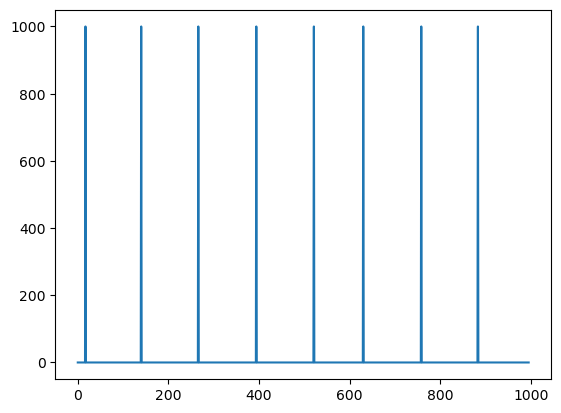

In [116]:
import matplotlib.pyplot as plt
df_2 = pd.read_csv('SU26212RMFS9.csv', delimiter=';')
df_2 = df_2.drop(['ISIN', 'Полное наименование ЦБ', 'Объем эмиссии (млн)', 'Непогашенный номинал', 'Размер выплаты, руб.*', 'Валюта номинала'], axis = 1)
df_2 = df_2.rename(columns = {'Дата':'date'})
df_2['date'] = pd.to_datetime(df2['date'], dayfirst = True)
df_2

df_comb = pd.merge(df, df_2, on = 'date', how = 'left').fillna(0)

plt.plot(df_comb['Номинал'])

## Проверка, что никакие файлы не потерялись

In [65]:
print(len(os.listdir('data')))
os.listdir('data')

17


['moex_ind.csv',
 'CHMF.csv',
 '.DS_Store',
 'gazp.csv',
 'ROSN.csv',
 'SNGSP.csv',
 'sber.csv',
 'STSB.csv',
 'MGNT.csv',
 'brent_prices.csv',
 'GMKN.csv',
 'eur_rate.csv',
 'int_rate.csv',
 'LPSB.csv',
 'rts_ind.csv',
 'usd_rate.csv',
 'LKOH.csv']

In [ ]:
# del file_paths['']
del file_paths['raw_shares_data']

In [66]:
# for name, path in file_paths.items():
#     print(name)
#     print(pd.read_csv(path, header = 0).columns)
#     print('-'*10)


Ура, эти 5 файлов немного высосали из меня силы, но зато теперь можно тестить второе задание и использовать этот ноутбук как пример для работы со следующими риск факторами.